In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
data = pd.read_csv('quikr_car.csv')

In [62]:
data.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [63]:
data.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

In [64]:
data.shape

(892, 6)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [66]:
data.dropna(inplace=True)

In [67]:
data.duplicated().sum()

92

In [68]:
data.drop_duplicates(inplace=True)

In [69]:
data['name']=data['name'].apply(lambda i : ' '.join(i.split(' ')[:3]))

In [71]:
data['year']=data['year'].astype('int')

In [72]:
data=data[data['Price']!='Ask For Price']

In [73]:
data['Price']=data['Price'].apply(lambda i : int(i.replace(',','')))

In [75]:
data['kms_driven']=data['kms_driven'].apply(lambda i : int(i.split(' ')[0].replace(',','')))

In [76]:
data.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


In [165]:
data.to_csv('cleaned_data.csv')

In [79]:
data.describe()

,year,Price,kms_driven
count,724.000000,7.240000e+02,724.000000
mean,2012.321823,4.032451e+05,46791.342541
std,4.122940,4.802936e+05,34575.416435
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.650000e+05,27000.000000
50%,2013.000000,2.900000e+05,42000.000000
75%,2015.000000,4.899990e+05,59000.000000
max,2019.000000,8.500003e+06,400000.000000


In [84]:
(data['Price']>6e6).sum()

1

In [85]:
data=data[data['Price']<6e6]

In [86]:
data.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


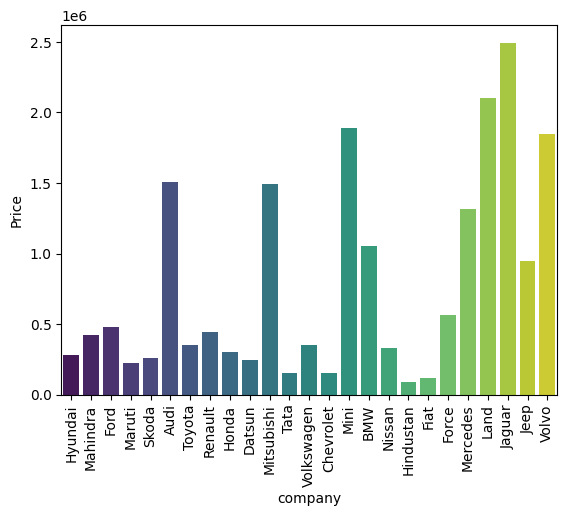

In [139]:
sns.barplot(data=data,x='company',y='Price',hue='company',palette='viridis',estimator='median',errorbar=('ci',False))
plt.xticks(rotation=90)
plt.show()

In [136]:
d=dict()
for i in data.groupby('company'):
  d[i[0]]=round(i[1]['Price'].mean(),2)

In [134]:
sorted(d.items(),key=lambda i : (i[1],i[0]),reverse=True)

[('Jaguar', 2495000.0),
 ('Land', 2100000.0),
 ('Mini', 1891111.0),
 ('Volvo', 1850000.0),
 ('Audi', 1554700.0),
 ('Mitsubishi', 1263000.0),
 ('Mercedes', 1170666.83),
 ('BMW', 1049875.0),
 ('Jeep', 950000.0),
 ('Force', 565000.0),
 ('Mahindra', 518166.14),
 ('Toyota', 502352.76),
 ('Ford', 488615.31),
 ('Nissan', 460666.33),
 ('Renault', 449573.38),
 ('Volkswagen', 421176.18),
 ('Honda', 348901.65),
 ('Hyundai', 321887.5),
 ('Hindustan', 303333.33),
 ('Skoda', 276448.8),
 ('Maruti', 271074.22),
 ('Datsun', 259166.33),
 ('Tata', 196902.52),
 ('Chevrolet', 196845.42),
 ('Fiat', 121500.0)]

In [140]:
from sklearn.model_selection import train_test_split

In [155]:
X_train,X_test,y_train,y_test=train_test_split(data.drop(columns=['Price']),data['Price']
                                               ,test_size=0.2,random_state=3)

In [156]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [157]:
ohe = OneHotEncoder()
ohe.fit(data[['name','company','fuel_type']])

OneHotEncoder()

In [158]:
column_trans =make_column_transformer((OneHotEncoder(categories=ohe.categories_)
                ,['name','company','fuel_type']),remainder='passthrough')

In [159]:
pipe = make_pipeline(column_trans,LinearRegression())

In [160]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [161]:
r2_score(y_test,pipe.predict(X_test))

0.8048835122708768

In [163]:
import pickle

In [164]:
pickle.dump(pipe,open('model.pkl','wb'))